In [15]:
# !mamba install ocetrac

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/ocetrac_logo_transparent.png" width=300/>
    <h4><span style="font:tradegothic; color:gray">Morphological image processing for monitoring ocean temperature extremes</span></h4>
    <hr>
</div>
<div align="center">
    <h4><span style="font:futura; color:purple">Hillary Scannell<sup>1</sup></span><span style="font:futura; style=color:black">, Ryan Abernathey<sup>1</sup>, Julius Busecke<sup>1</sup></span>, David John Gagne<sup>2</sup>, <br>LuAnne Thompson<sup>3</sup>, and Daniel Whitt<sup>4</sup></h4>
    <h6><span style="font:tradegothic; color:gray"><sup>1</sup>Lamont-Doherty Earth Observatory, Columbia University, Palisades, NY, USA</span></h6>
    <h6><span style="font:tradegothic; color:gray"><sup>2</sup>National Center for Atmospheric Research, Boulder, CO, USA</span></h6>
    <h6><span style="font:tradegothic; color:gray"><sup>3</sup>School of Oceanography, University of Washington, Seattle, WA, USA</span></h6>
    <h6><span style="font:tradegothic; color:gray"><sup>4</sup>NASA Ames Research Center, Mountain View, CA, USA</span></h6>
</div>
<br>
<br>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2>Abstract</h2>
     <hr>
</div>
Dangerous hot-water events, called marine heatwaves, cause prolonged periods of thermal stress in the marine environment that can lead to widespread coral bleaching, harmful algal blooms, unproductive fisheries, and even economic loss. Anticipating the paths of destructive marine heatwaves remains a challenge owing to the complex spatiotemporal evolution of these events. We present a novel open source package called Ocetrac that implements morphological image processing and tracking to aid in the analysis of marine heatwave detection and movement. We discuss how this approach can be applied to monitor other extreme ocean conditions, such as deoxygenation and acidification.
<br>
<div align="center">
    <img src="./images/title_footer.png" width=100%/>
</div>
<br>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/warming_trend_space.png" width=100%/>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/trend_as_map.png" width=100%/>
    <h2><span style="font:futura; color:black">Warming is not spatially homogenous</span></h2>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Many species can cope with natural temperature fluctuations</span></h2>
    <img src="./images/natural_temp.png" width=90%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/migratory.png" width=80%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">As temperatures rise, heat extremes become more deadly</span></h2>
    <img src="./images/anthropogenic_temp.png" width=100%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/impacts.png" width=80%/>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">We define these hot water events as Marine Heatwaves</span></h2>
    <img src="./images/mhw_explanation.png" width=100%/>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Marine heatwaves occur throughout the global ocean</span></h2>
    <img src="./images/Frolicher_Laufkotter.png" width=100%/>
</div>

In [43]:
from IPython.display import HTML

In [44]:
%%HTML 
<video controls autoplay width="100%" height="100%">
  <source src="./video/sst_pos.mp4" type="video/mp4">
</video>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->

<div align="left" style="font-size:30px;">
    <h3>Motivation</h3>
     <hr>
</div>
<div align="left" style="font-size:28px;">
    <ul>
      <li>Marine heatwaves don't stay in one place.</li> 
      <li>They have complex spatial connectivity and temporal behavior.</li>
      <li>Local analyses may not completely characterize the evolution of these events.</li> 
    </ul> 
</div>



<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="left" style="font-size:30px;">
    <h3>Goals of Ocetrac</h3>
     <hr>
</div>
<div align="left" style="font-size:28px;">
    <ol>
      <li>Identify marine heatwaves as 2D objects from sea surface temperature anomaly images.</li>
      <li>Track marine heatwave objects in both space and time. </li>
      <li>Create a new labeled dataset of marine heatwave events to better understand the evolution and patterns of marine heatwaves globally.</li>
    </ol> 
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/sst_globe.png" width=100%/>
    <h2><span style="font:futura; color:black">NOAA Optimum Interpolation Sea Surface Temperature v2.1</span></h2>
    <h4><span style="font:futura; color:black">daily means from September 1981–present</span></h4>
    <h4><span style="font:futura; color:black">0.25º longitude x 0.25º latitude grid</span></h4>
</div>

<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <img src="./images/stacked_images.png" width=100%/>
    <h2><span style="font:futura; color:black">Data Preprocessing</span></h2>
    <h4><span style="font:futura; color:black">Compute Sea Surface Temperature Anomalies</span></h4>
    <h4><span style="font:futura; color:black">Extract only the extreme positive values that exceed some threshold (e.g., 90<sup>th</sup> percentile)</span></h4>
</div>


<!-- background: #fff4e3-->
<!-- color: #2d2422 -->
<div align="center">
    <h2><span style="font:futura; color:black">Morphological Operations</span></h2>
    <img src="./images/mo_overview.png" width=100%/>
</div>

<h1 style="align: center;"><img style="display: inline;" src="https://raw.githubusercontent.com/pangeo-data/branding/master/logo/v_small_pangeo_logo.png"> <img style="display: inline;" src="./images/pangeo_forge.png" width=15%></h1>

### Importing data
* NOAA OISST v2.1 dataset is on the Pangeo Forge Bucket on Open Storage Network backed by AWS
* Pangeo Forge transforms netCDF source files from NOAA into a cloud optimized zarr store
* Read more about Pangeo Forge: https://pangeo-forge.readthedocs.io/ 
* What your dataset in the cloud? Submit a staged recipe issue: https://github.com/pangeo-forge/staged-recipes/issues



In [45]:
import s3fs
import xarray as xr

endpoint_url = 'https://ncsa.osn.xsede.org'
fs_osn = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': endpoint_url},) 

path = "Pangeo/pangeo-forge/noaa_oisst/v2.1-avhrr.zarr"
ds = xr.open_zarr(fs_osn.get_mapper(path), consolidated=True)
ds

,Array,Chunk
Bytes,60.27 GB,82.94 MB
Shape,"(14532, 1, 720, 1440)","(20, 1, 720, 1440)"
Count,728 Tasks,727 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,60.27 GB,82.94 MB
Shape,"(14532, 1, 720, 1440)","(20, 1, 720, 1440)"
Count,728 Tasks,727 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [ ]:

Feature Extraction

Identify candidate points by eliminating those that do not satisfy a prescribed set of thresholds

Object Detection

Determine whether a closed contour exists around a cluster of candidate points.
Remove small isolated clusters as well as fill small holes within larger clusters.
Eliminate closed contour object that do no meet a prescribed size threshold

Multiple Object Tracking

Stitch connected objects in time, allowing them to split and merge
Produce a new labeled dataset of marine heatwaves events

In [3]:
from dask_gateway import Gateway
from dask.distributed import Client

gateway = Gateway()
cluster = gateway.new_cluster()
cluster.adapt(minimum=1, maximum=20)
cluster


In [4]:
client = Client(cluster)
client

Client Scheduler: gateway://traefik-gcp-uscentral1b-prod-dask-gateway.prod:80/prod.d919e3a8588d4baca6c43a389dfaa019 Dashboard: /services/dask-gateway/clusters/prod.d919e3a8588d4baca6c43a389dfaa019/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


<ipython-input-9-b307499041fc>:13: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)


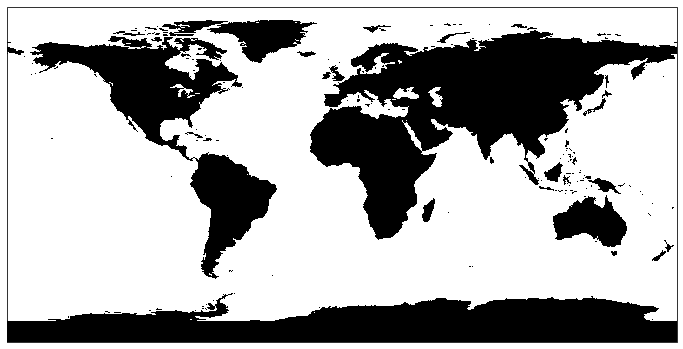

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define a mask
mask = ds.sst.isel(time=0, zlev=0).fillna(-999)
mask = mask.where(mask==-999, other = 1)
mask = mask.where(mask==1, other = 0)

plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
mask.plot(transform=ccrs.PlateCarree(), vmin=0, vmax=1, cmap='Greys_r', extend='max', add_colorbar=False, label=False)
ax.set_title('')
ax.background_patch.set_visible(False)